In [59]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from keras.models import Sequential

import glob, os, random

In [60]:
base_path = 'C:\\Users\qdio8\\Desktop\\garbage (ver. 4.2)\\garbage (ver 4.2)'

img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))


print(len(img_list))

4627


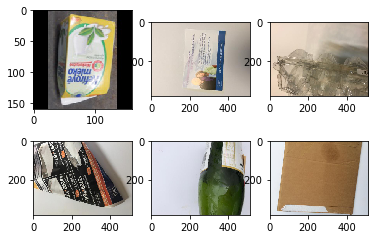

In [61]:
for i, img_path in enumerate(random.sample(img_list, 6)):
    img = load_img(img_path)
    img = img_to_array(img, dtype=np.uint8)

    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [62]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

Found 4456 images belonging to 6 classes.
Found 491 images belonging to 6 classes.
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [63]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 37, 37, 32)       

In [64]:
#step_per_epoch 구하는법 = 훈련 샘플의 수/ batch_size -> 4456/16 = 278.5
#validation_step 구하는법 = 검증 샘플의 수/batch_size -> 491/16 =30.6875
model.fit_generator(train_generator, steps_per_epoch=278, epochs=50, validation_data=validation_generator,validation_steps=31)

Epoch 1/50
278/278 [==============================] - 639s 2s/step - loss: 1.4525 - acc: 0.3815 - val_loss: 1.7322 - val_acc: 0.3401
Epoch 2/50
278/278 [==============================] - 639s 2s/step - loss: 1.2427 - acc: 0.4664 - val_loss: 1.4046 - val_acc: 0.3788
Epoch 3/50
278/278 [==============================] - 642s 2s/step - loss: 1.1356 - acc: 0.5194 - val_loss: 1.5306 - val_acc: 0.4338
Epoch 4/50
278/278 [==============================] - 634s 2s/step - loss: 1.0813 - acc: 0.5583 - val_loss: 1.9815 - val_acc: 0.4888
Epoch 5/50
278/278 [==============================] - 625s 2s/step - loss: 1.0283 - acc: 0.5804 - val_loss: 1.9216 - val_acc: 0.4562
Epoch 6/50
278/278 [==============================] - 629s 2s/step - loss: 0.9953 - acc: 0.5998 - val_loss: 1.4262 - val_acc: 0.4664
Epoch 7/50
278/278 [==============================] - 628s 2s/step - loss: 0.9545 - acc: 0.6205 - val_loss: 0.6392 - val_acc: 0.5031
Epoch 8/50
278/278 [==============================] - 626s 2s/step - 

In [65]:
print("-- Evaluate --")
scores = model.evaluate_generator(validation_generator, steps=31)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 67.82%


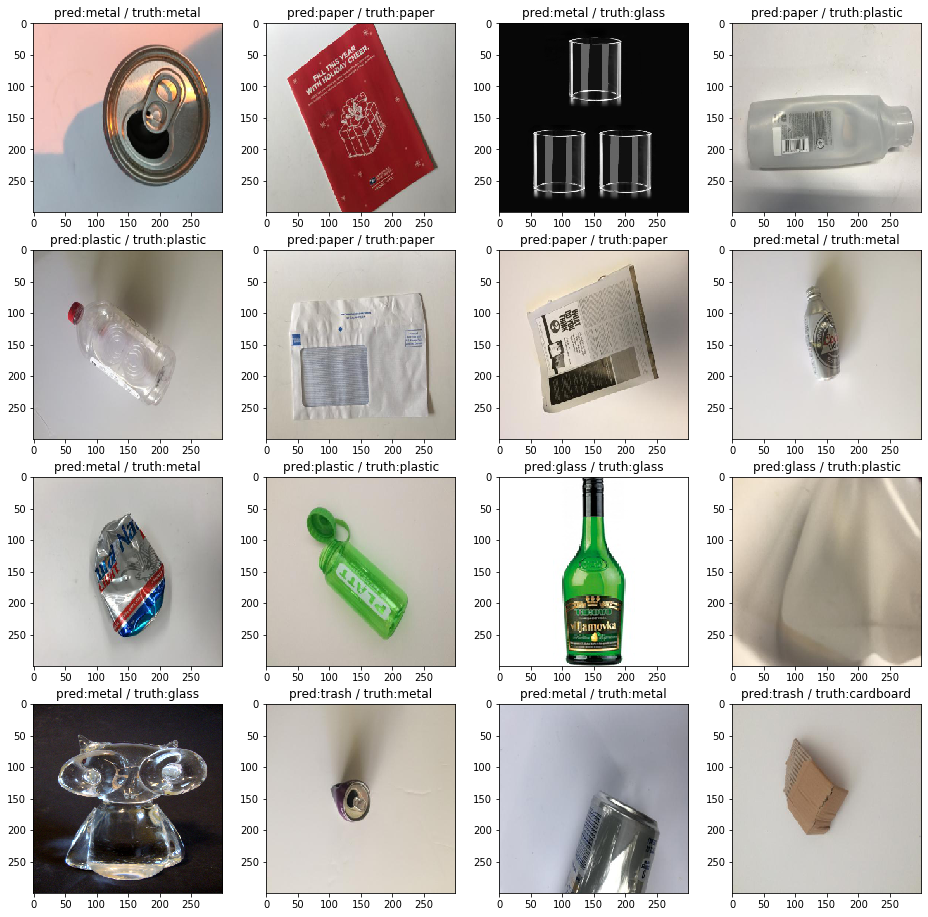

In [66]:
test_x, test_y = validation_generator.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])